In [1]:
# Date: 15-03-2020
# Author: Redouane Lguensat

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
from scipy.optimize import curve_fit
%matplotlib inline

In [3]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
df_recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238


# Morocco

In [5]:
df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:,'2/22/20':]

,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
64,0,0,0,0,0,0,0,0,0,1,...,2,2,2,2,2,3,5,6,7,17


In [6]:
#list(df_confirmed)[4:]

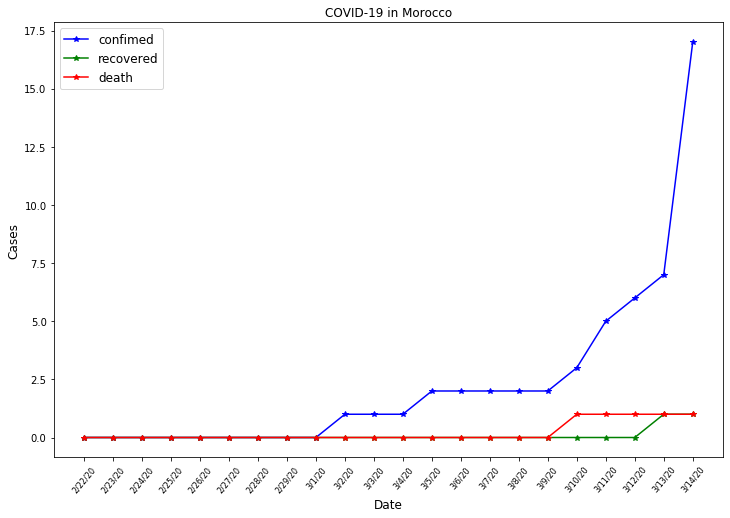

In [7]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[35:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-',color='blue')
plt.plot(list(df_recovered)[35:],df_recovered[df_recovered['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-',color='green')
plt.plot(list(df_deaths)[35:],df_deaths[df_deaths['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-', color='red')
plt.legend(['confimed','recovered','death'],fontsize=12)
plt.title('COVID-19 in Morocco')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

# 7-day forecast of COVID-19 infections in Morocco

At this time, data is still scarce and not suitable for accurate modeling, these results are then highly uncertain for now.

### Fit an exponential curve (worst case, not realistic)

population is finite thus an exponential model is not realistic but gives insights about the beggining of an infection

In [8]:
nbdays = 23  #nbdays of available data from 2/22/20

U,V = curve_fit(lambda t,a,b: a*np.exp(b*t),
          np.arange(1,nbdays),
          df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:])

In [9]:
U, V

(array([0.00166755, 0.41437759]), array([[ 2.46304224e-06, -6.93944907e-05],
        [-6.93944907e-05,  1.96110991e-03]]))

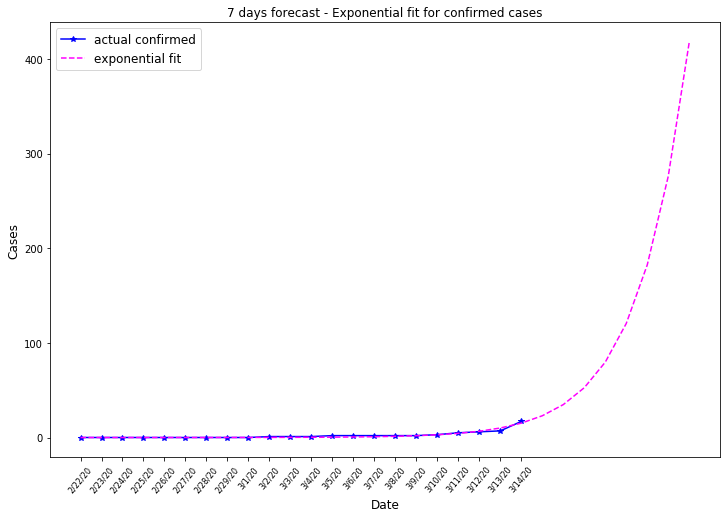

In [10]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[35:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:], '*-',color='blue')
plt.plot(np.arange(0,nbdays+7),U[0]*np.exp(U[1]*np.arange(1,nbdays+8)), '--',color='magenta')
plt.legend(['actual confirmed','exponential fit'],fontsize=12)
plt.title('7 days forecast - Exponential fit for confirmed cases')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()

### Fit a logisitic curve (more realistic)

This model is widely used for estimating the growth of a population and also to simply model infections

In [11]:
def logistic_model(x,a,b,c):
    return c/(1+np.exp(-(a*x+b)))

In [12]:
nbdays = 23  #nbdays of available data from 2/22/20

U,V = curve_fit(logistic_model,
          np.arange(1,nbdays),
          df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '2/22/20':].values[0,:],
          p0=[1,1,1])

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

data is not sufficient to find a good logistic fit... 

# Comparison with Malaysia

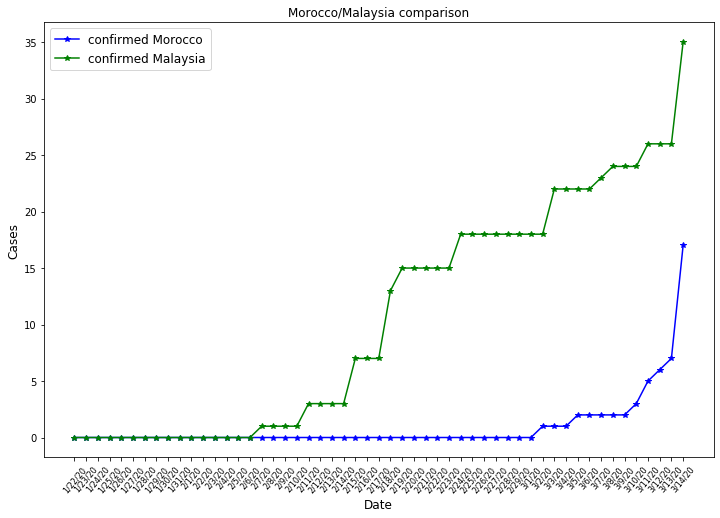

In [13]:
plt.figure(figsize=(12, 8))
plt.xticks(rotation=50,size=8)
plt.plot(list(df_confirmed)[4:],df_confirmed[df_confirmed['Country/Region']=='Morocco'].loc[:, '1/22/20':].values[0,:], '*-',color='blue')
plt.plot(list(df_confirmed)[4:],df_recovered[df_recovered['Country/Region']=='Malaysia'].loc[:, '1/22/20':].values[0,:], '*-',color='green')
plt.legend(['confirmed Morocco','confirmed Malaysia'],fontsize=12)
plt.title('Morocco/Malaysia comparison')
plt.xlabel('Date',size=12)
plt.ylabel('Cases',size=12)
#plt.style.use('dark_background')
plt.show()